In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_all.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_all.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_all.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_all.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 42), (4499, 1), (4233, 43), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [6]:
X_test = X_test.iloc[:,1:43]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 42, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [7]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,42,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 42, 64)         1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 42, 64)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 42, 64)         256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 21, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 21, 128)        204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 21, 128)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 21, 128)        5

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 42, 64)         1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 42, 64)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 42, 64)         256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 21, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 21, 128)        204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 21, 128)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 21, 128)        5

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 42, 1), (4233, 1, 42, 1), (4499, 10), (4233, 10))

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 


num_epochs = 120
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_all = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/120
71/71 [==============================] - 10s 93ms/step - loss: 1.4490 - accuracy: 0.5261 - val_loss: 2.3398 - val_accuracy: 0.1935

Epoch 00001: val_loss improved from inf to 2.33975, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/120
71/71 [==============================] - 4s 58ms/step - loss: 0.7440 - accuracy: 0.7542 - val_loss: 3.4922 - val_accuracy: 0.1271

Epoch 00002: val_loss did not improve from 2.33975
Epoch 3/120
71/71 [==============================] - 4s 54ms/step - loss: 0.5062 - accuracy: 0.8333 - val_loss: 4.4385 - val_accuracy: 0.1481

Epoch 00003: val_loss did not improve from 2.33975
Epoch 4/120
71/71 [==============================] - 4s 55ms/step - loss: 0.3819 - accuracy: 0.8746 - val_loss: 5.0856 - val_accuracy: 0.1505

Epoch 00004: val_loss did not improve from 2.33975
Epoch 5/120
71/71 [==============================] - 3s 49ms/step - loss: 0.3038 - accuracy: 0.8969 - val_loss: 5.0536 - val_accuracy: 0.2069

Epoch 00005: val_loss 

71/71 [==============================] - 15s 206ms/step - loss: 0.0430 - accuracy: 0.9844 - val_loss: 2.9407 - val_accuracy: 0.5698

Epoch 00042: val_loss did not improve from 2.02236
Epoch 43/120
71/71 [==============================] - 14s 201ms/step - loss: 0.0318 - accuracy: 0.9913 - val_loss: 3.0130 - val_accuracy: 0.5738

Epoch 00043: val_loss did not improve from 2.02236
Epoch 44/120
71/71 [==============================] - 16s 225ms/step - loss: 0.0326 - accuracy: 0.9893 - val_loss: 3.2059 - val_accuracy: 0.5745

Epoch 00044: val_loss did not improve from 2.02236
Epoch 45/120
71/71 [==============================] - 14s 203ms/step - loss: 0.0534 - accuracy: 0.9860 - val_loss: 3.3252 - val_accuracy: 0.5632

Epoch 00045: val_loss did not improve from 2.02236
Epoch 46/120
71/71 [==============================] - 16s 229ms/step - loss: 0.0393 - accuracy: 0.9869 - val_loss: 3.1768 - val_accuracy: 0.5481

Epoch 00046: val_loss did not improve from 2.02236
Epoch 47/120
71/71 [========

71/71 [==============================] - 11s 161ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 3.6922 - val_accuracy: 0.5656

Epoch 00083: val_loss did not improve from 2.02236
Epoch 84/120
71/71 [==============================] - 10s 140ms/step - loss: 0.0304 - accuracy: 0.9918 - val_loss: 3.8047 - val_accuracy: 0.5575

Epoch 00084: val_loss did not improve from 2.02236
Epoch 85/120
71/71 [==============================] - 10s 138ms/step - loss: 0.0327 - accuracy: 0.9902 - val_loss: 3.8545 - val_accuracy: 0.5632

Epoch 00085: val_loss did not improve from 2.02236
Epoch 86/120
71/71 [==============================] - 10s 139ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 3.9427 - val_accuracy: 0.5549

Epoch 00086: val_loss did not improve from 2.02236
Epoch 87/120
71/71 [==============================] - 8s 107ms/step - loss: 0.0400 - accuracy: 0.9898 - val_loss: 3.9490 - val_accuracy: 0.5736

Epoch 00087: val_loss did not improve from 2.02236
Epoch 88/120
71/71 [=========

In [12]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9988886713981628
Testing Accuracy:  0.5698086619377136


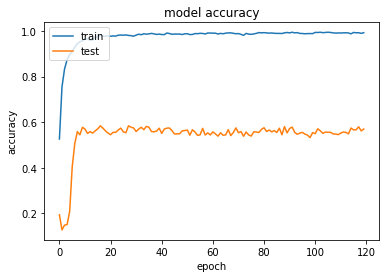

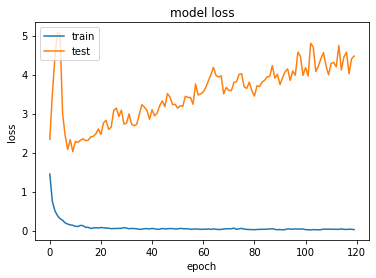

In [13]:
# summarize history for accuracy
plt.plot(model_all.history['accuracy'])
plt.plot(model_all.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_all.history['loss'])
plt.plot(model_all.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#Avg Test accuracy and Standart Devision 

In [15]:
train_hist = pd.DataFrame(model_all.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.449008,0.526117,2.339750,0.193480
1,0.743973,0.754168,3.492202,0.127097
2,0.506190,0.833296,4.438462,0.148122
3,0.381920,0.874639,5.085618,0.150484
4,0.303787,0.896866,5.053600,0.206945
...,...,...,...,...
115,0.029888,0.993776,4.453313,0.566265
116,0.027647,0.992665,4.572825,0.566738
117,0.032598,0.992665,4.019861,0.579731
118,0.031510,0.989998,4.406757,0.562013


In [16]:
print(train_hist["val_accuracy"].describe())

count    120.000000
mean       0.540921
std        0.081133
min        0.127097
25%        0.548547
50%        0.556816
75%        0.567033
max        0.583983
Name: val_accuracy, dtype: float64


In [17]:
#checking part

In [18]:
test_hist_avg = pd.DataFrame(model_all.history).mean()
test_hist_avg

loss            0.074956
accuracy        0.976413
val_loss        3.510927
val_accuracy    0.540921
dtype: float64

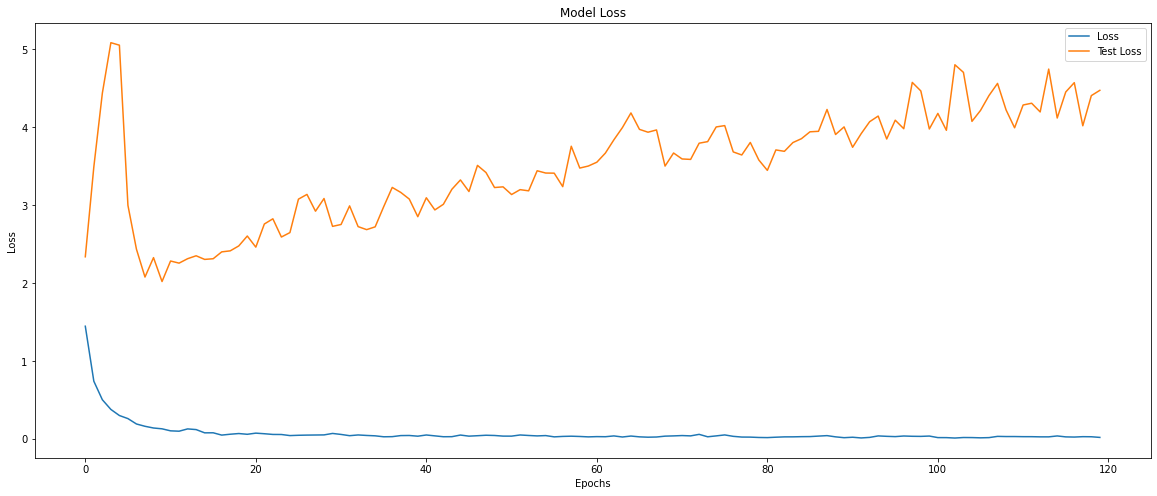

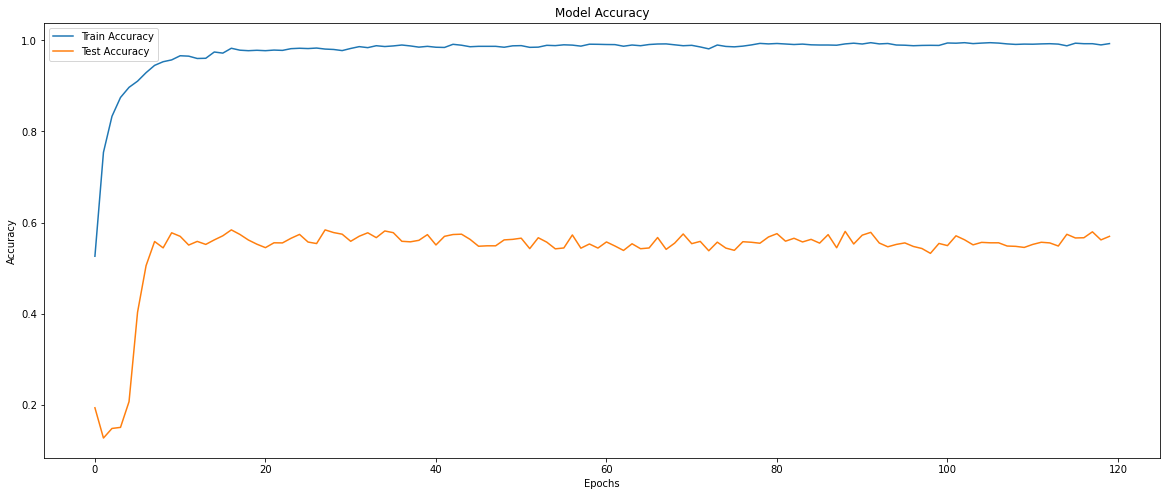

In [19]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [20]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[119   5  64   8  59  71  34  35  61  44]
 [  0 183   5   4   4   2   0   4   2  17]
 [  6   2 280  47  15  11  10  11  70  48]
 [ 15   8  32 338  15   6  19   4  44  19]
 [ 15   5  22  44 225  15  17 117  13  27]
 [ 26  11  30  32  45 258   2  16  30  33]
 [  1   0  13  18   0   1 144   0   6   1]
 [ 15   1   1  11 168   3  11 199  19  24]
 [  4   4   6  32   2   7   0   0 330   8]
 [ 15   9  49  17  22   4   1  13  34 336]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.55      0.24      0.33       500
           1       0.80      0.83      0.82       221
           2       0.56      0.56      0.56       500
           3       0.61      0.68      0.64       500
           4       0.41      0.45      0.43       500
           5       0.68      0.53      0.60       483
           6       0.61      0.78      0.68       184
           7       0.50      0.44      0.47       452
           8       0.54      0.